Power Method
-------------

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


ds_1 = xr.open_dataset("data/regions_verify_isotope_202112_cov.nc")
bio_1 = ds_1["covariance_bio"]
anth_1 = ds_1["covariance_anth"]

ds_2 = xr.open_dataset("data/regions_verify_202104_cov.nc")
bio_2 = ds_2["covariance_bio"]
anth_2 = ds_2["covariance_anth"]

M = anth_2.values
N = bio_1.values

In [2]:
#!/usr/bin/env python3

import numpy as np

def first_eigvec(A, n_iterations: int):
    """A slightly modified version of
    the function power_iteration retrieved from 
    https://en.wikipedia.org/wiki/Power_iteration
    (Retrieved: 8.9.2022)
    Function computes an estimation
    of the eigenvector corresponding
    to the largest eigenvalue of 
    2-D array A"""
    w0 = np.random.rand(A.shape[1])
    norm = np.linalg.norm(w0)
    #normalize
    w0 = w0 / norm

    for j in np.arange(n_iterations):
        # calculate the matrix-by-vector product Ab
        wj = A.dot(w0)

        # calculate the norm
        norm = np.linalg.norm(wj)

        # re normalize the vector
        w0 = wj / norm

    return w0

def rayleigh_quotient(A, v):
    """Function computes the rayleigh quotient for 2-d numpy array A and normalized vector v.
    (Because v normalized, the denominator v.T.dot(v)=1, and can thus be omitted.)
    If v is an eigenvector of A, the quotient gives the corresponding eigenvalue."""
    mu = v.T.dot(A).dot(v)
    return mu

def residual_norm(A, v, mu):
    """Compute the 2-norm of the residual vector r = Av-av, where
    A is a 2-d numpy array, v an approximated eigenvector and a is an approximation of
    corresponding eigenvalue. Can be used to evaluate the accuracy of the estimated
    eigenvector and -value."""
    r = A.dot(v)-mu*v
    norm = np.linalg.norm(r)
    return norm

def hotelling2(A, v, mu, n_iterations):
    """Function to compute the second eigenvector after the largest
    eigenvalue and corresponding eigenvector has been computed.
    Function utilizes Hotelling's method.
    Parameters:
    A : 2D array
    v : 1D array. Eigenvector corresponding to the largest eigenvalue of A. 
    a : float. Largest eigenvalue of A.
    num_simulations : int"""
    w0 = np.random.rand(A.shape[1])
    norm = np.linalg.norm(w0)
    #normalize
    w0 = w0 / norm

    for i in np.arange(n_iterations):
        wi = A.dot(w0)-mu*v*(v.T.dot(w0))

        norm = np.linalg.norm(wi)

        #normalize
        w0 = wi / norm

    return w0

def hotelling(A, v, mu, n_vectors, n_iterations):
    """Function that uses Hotelling's deflation
    method to compute the eigenvectors that
    correspond to the second, third, ... , (n_vectors)th
    largest eigenvalues along
    with their corresponding eigenvector. The largest eigenvalue
    and corresponding eigenvector need to have been computed first.
    Returns n_vectors eigenvectors as rows of an array and the eigenvalues
    as a list in descending order"""

    n = A.shape[1]
    #array for storing the eigenvectors as its rows
    V_T = v

    #list for storing the eigenvalues
    mu_s = np.array(mu)

    #array with mu*v as columns
    V_mu = mu*v
    

    #each new eigenvector and eigenvalue computed iteratively
    #using the previously computed ones
    for i in np.arange(n_vectors-1):
        
        #initial guess
        w0 = np.random.rand(n)
        norm = np.linalg.norm(w0)
        #normalize
        w0 = w0/norm
    
        #power iteration
        for j in np.arange(n_iterations):
            #Hotelling's deflation
            wj = A.dot(w0)-V_mu.dot(V_T.dot(w0))

            norm = np.linalg.norm(wj)

            #normalize
            w0 = wj / norm
        
        #calculate corresponding eigenvalue
        mu0 = rayleigh_quotient(A, w0)

        # store the eigenvector and eigenvalues 
        V_T = np.row_stack((V_T, w0))
        mu_s = np.append(mu_s, mu0)
        V_mu = np.column_stack((V_mu, mu0*w0))

    return V_T, mu_s 

def power_method(A, n_vectors, n_iterations):
    """Function estimates the n_vectors eigenvectors
    with largest eigenvalues of 2-D array A using
    the power method. Returns the estimated eigenvectors
    as rows in an array and the estimated eigenvalues as a list"""

    # compute the eigenvector with
    # the largest eigenvalue
    v = first_eigvec(A, n_iterations)
    mu = rayleigh_quotient(A, v)

    if n_vectors < 2:
        return v, mu
    else:
        #compute the other eigenvectors and eigenvalues
        #using Hotelling's deflation and Rayleigh quotient
        V_T, mu_s = hotelling(A, v, mu, n_vectors, n_iterations)
        return V_T, mu_s

In [25]:






#OBS! NEED TO CHECK IF THERE IS A DIFFERENCE IN SPEED WITH A.dot(v) vs. np.dot(A, v)



Quick checks how the rows and columns work with different commands

In [4]:

u = np.ones(5)
w = np.ones(5)*2
u_T = np.array([u])
uw_T = np.row_stack((u,w))
uw = np.column_stack((u,w))
print(uw)
print(uw_T)
print(uw_T.dot(uw))

[[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]]
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]]
[[ 5. 10.]
 [10. 20.]]


Below the "real" eigenvalues and eigenvectors
----------------------------------------------

In [2]:


#compute eigenvalues and eigenvectors of M. Note: np.linalg.eigh gives eigenvalues in ascending order, 
# so the largest is last, and so is the corresponding eigenvector. 
# (NOTE: Don't need to worry abot how the order treats negative values as all eigenvalues of a positive semidefinite matrix are nonnegative)

evals, evecs = np.linalg.eigh(M) 
#largest eigenvalue and corresponding evec
eval1, evec1 = evals[-1], evecs[-1]
#second largest
eval2, evec2 = evals[-2], evecs[-2]




In [16]:
print(evec1)
print(evec2)
evec1.shape

[1. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


(6858,)

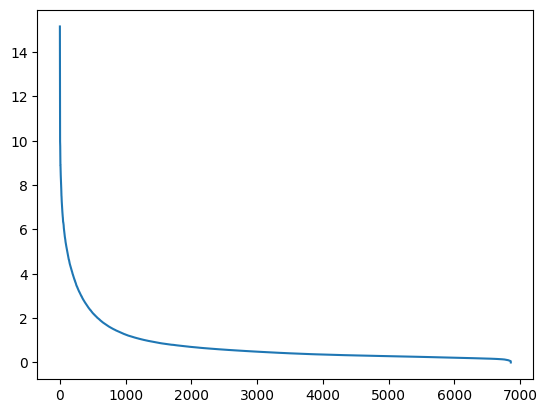

In [11]:

fig, ax = plt.subplots()
ax.plot(np.arange(len(M)), evals[::-1]) #need to reverse the order of the eigvalues, because np.linalg.eigh gives them in ascending order
#ax.set_yscale("log")
plt.show()

Truncated SVD
--------------

Implementing truncated SVD as an estimate of the matrix inverse

In [33]:
r = 400

t_evals = evals[::-1].copy()
t_evals[r:] = 0
#take inverse of the r largest eigenvalues
t_evals[:r] = 1/t_evals[:r]
t_evecs = np.fliplr(evecs)
t_evecs[:, r:] = 0

print(t_evals[0])



0.06598679308236337


In [6]:
act_invM = np.linalg.inv(M)

In [34]:
Mtsvd = t_evecs.dot(np.diag(t_evals)).dot(t_evecs.T) 

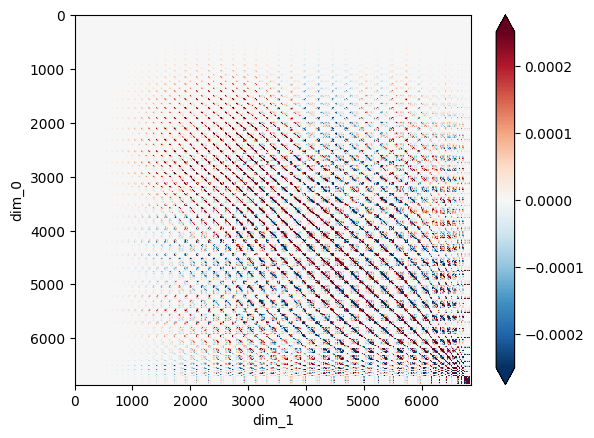

In [35]:
Mtsvd = xr.DataArray(Mtsvd)
fig, ax = plt.subplots()
Mtsvd.plot.imshow(yincrease = False, robust = True)
plt.show()

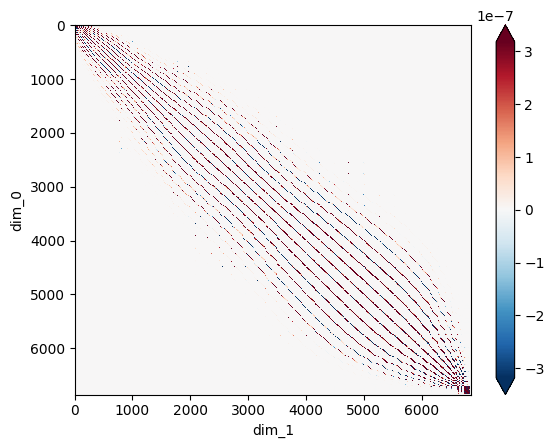

In [7]:
act_invM = xr.DataArray(act_invM)
fig, ax = plt.subplots()
act_invM.plot.imshow(yincrease = False, robust = True)
plt.show()

Testing the convergence of the eigenvalue estimates
---------------------------------------------------

In [7]:

print(evals[range(-1,-500,-1)])



[15.15454765 11.69482561 10.32612078  9.96130532  9.89193315  9.75719582
  9.24783414  9.15443245  8.89805937  8.89677888  8.70833449  8.57827471
  8.480616    8.442306    8.37016884  8.20974608  8.16437133  8.12131873
  7.97676669  7.93956906  7.82334086  7.81316668  7.66265984  7.58205222
  7.50829735  7.48964067  7.33508437  7.26973259  7.26901381  7.21151976
  7.18736552  7.1623497   7.12815879  7.00966882  7.0044297   6.93104487
  6.88485598  6.8072074   6.78371445  6.73600985  6.69717811  6.65563704
  6.62729434  6.55959354  6.54931686  6.53780389  6.46489517  6.45807605
  6.37861479  6.3361404   6.33305796  6.33159464  6.30818108  6.29554585
  6.27008196  6.22122141  6.2076039   6.19458915  6.0942128   6.07730724
  6.06229881  6.04101702  6.02316135  5.98209365  5.95785506  5.94728766
  5.90496726  5.88136927  5.83020675  5.82703167  5.80729998  5.77127834
  5.75486824  5.73679809  5.71804387  5.67364378  5.65498058  5.63677967
  5.61045504  5.59369332  5.56463454  5.55684648  5

In [40]:

iterations = np.arange(1,16)
VT, power_evals = power_method(M,3,1) 
for i in range(1,15):
    V_T, mu_s = power_method(M,3,iterations[i])
    power_evals = np.row_stack((power_evals,mu_s))


print(power_evals)

[[ 8.95015379  5.03796752  5.39026672]
 [10.28455441 11.62341016  8.94869316]
 [11.75812748 13.41428505 10.41673473]
 [13.10486328 13.01677628 10.39477457]
 [13.45744177 12.94227662 10.56029955]
 [14.49098743 12.02012375 10.25989743]
 [14.73353013 11.88830848 10.12184756]
 [14.94936276 11.6738907  10.05545556]
 [14.96762814 11.77543505 10.01945319]
 [15.05941372 11.68432194  9.96079893]
 [15.10690087 11.65535614 10.00608674]
 [15.12905192 11.63898862 10.02038972]
 [15.1385499  11.66326257 10.02296763]
 [15.14477442 11.66880772 10.0594831 ]
 [15.14958066 11.67197106 10.08503915]]


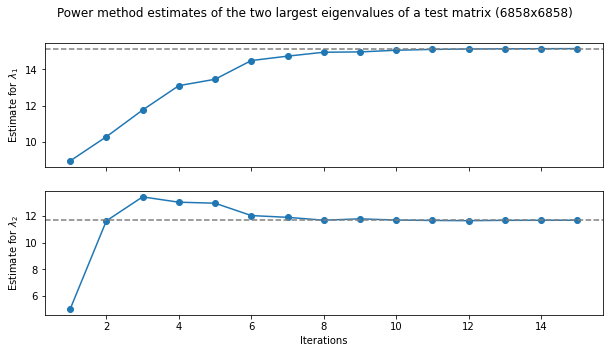

In [43]:
import matplotlib.pyplot as plt
labels = [r'$\lambda_1$', r'$\lambda_2$', r'$\lambda_3$']

fig, axs = plt.subplots(2,1, figsize = (10,5), sharex='col')
for i in range(2):
    axs[i].plot(iterations, power_evals[:,i], marker = 'o')
    axs[i].axhline(y=evals[-(i+1)], linestyle = 'dashed', color = 'grey')
    axs[i].set_ylabel(f"Estimate for {labels[i]}")
axs[1].set_xlabel("Iterations")
fig.suptitle("Power method estimates of the two largest eigenvalues of a test matrix (6858x6858)")
plt.tight_layout
plt.show()

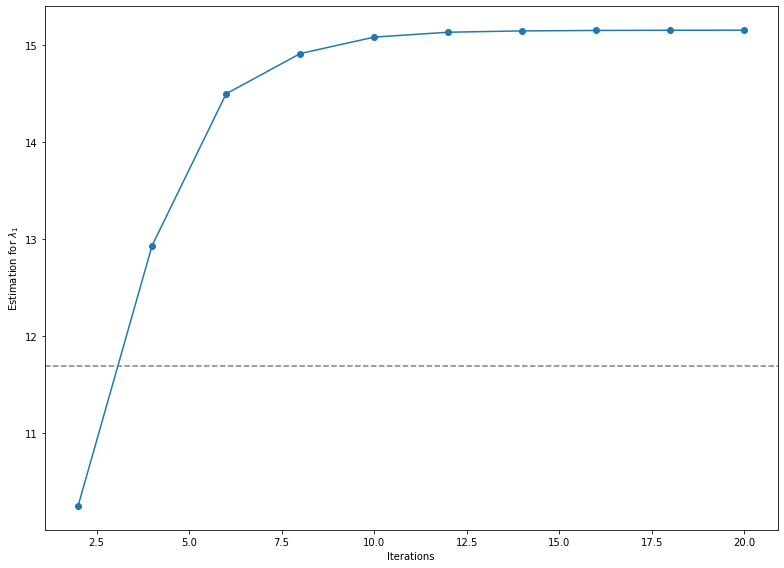

In [36]:
fig, ax = plt.subplots(figsize = (11,8), layout = 'tight', sharex='row')
ax.plot(iterations, power_evals[:,0], marker = 'o')
ax.axhline(y=evals[-(i+1)], linestyle = 'dashed', color = 'grey')
ax.set_ylabel(f"Estimation for {labels[0]}")
ax.set_xlabel("Iterations")
plt.show()

In [75]:
largest_evecs = evecs[range(-1,-11,-1)]
residuals = []
diffs = []
for i in range(10):
    residual = residual_norm(M, V_T[i], mu_s[i])
    residuals.append(residual)
    diff = np.linalg.norm(largest_evecs[i]-V_T[i])
    diffs.append(diff)
print(residuals)
print(diffs)




[3.4060245772776416e-11, 3.618968745565533e-06, 0.009194577471923478, 0.024766905747349317, 0.02288058312727909, 0.04620733890848414, 0.0492595791563369, 0.0848178556572693, 0.0868597470467658, 0.12367572420895566]
[1.4142135623730951, 1.4142135623730945, 1.4142135623717602, 1.4142135622969043, 1.4142135623339784, 1.4142135586715225, 1.414213514188876, 1.414213525606388, 1.4142134352976992, 1.414213321693363]


In [67]:
eval1/eval2

1.295833572422536

In [58]:
print(largest_evecs[0])
print(V_T[0])

[0. 0. 0. ... 0. 0. 0.]
[1.02238389e-17 3.17420128e-17 4.43083516e-17 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [18]:

# check if the real and approximated eigenvector linearly dependent
A = np.stack((v_2, evec2), axis=1)
np.linalg.matrix_rank(A)



2

11.694825610284667


In [7]:
for i in np.arange(len(evec1)):
    x = evec1[i]
    if x != 0.0:
        print(i,x)

11 1.0


In [51]:
for i in range(50,400,50):
    v_2 = hotelling2(M, v, a, i)
    a_2 = rayleigh_quotient(M, v_2)
    norm = residual_norm(M, v_2, a_2)
    print(f"Iteration {i}, residual norm: {norm}")
    

Iteration 50, residual norm: 0.002694597137400284
Iteration 100, residual norm: 0.00023027591081764133
Iteration 150, residual norm: 6.717010804712341e-05
Iteration 200, residual norm: 0.00014071462095937545
Iteration 250, residual norm: 0.00015732072384204554
Iteration 300, residual norm: 0.00018789944059598136
Iteration 350, residual norm: 1.0853296793970103e-06


In [49]:
#print(f"Real eigval: {eval1}")


for i in range(100,1000, 100):
    v = power_iteration(M, i)
    a = rayleigh_quotient(M, v)
    norm = residual_norm(M, v, a)
    print(f"Iteration: {i}, residual norm: {norm}")
    #print(f"Iteration: {i}, estimated eigval: {a}, residual norm: {norm}")
    
    

Iteration: 100, residual norm: 1.0367997085054587e-07
Iteration: 200, residual norm: 2.0375336947625995e-13
Iteration: 300, residual norm: 5.551169297415832e-17
Iteration: 400, residual norm: 5.551157474611588e-17
Iteration: 500, residual norm: 5.551157474611588e-17
Iteration: 600, residual norm: 5.551157474611588e-17
Iteration: 700, residual norm: 5.551157474611588e-17
Iteration: 800, residual norm: 5.551157474611588e-17
Iteration: 900, residual norm: 5.551157474611588e-17
